# 23: REGRESIÓN POLINÓMICA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../../Recursos_curso/datasets/auto/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
# Comprobar cuantos datos N/A tenemos

pd.isnull(data).values.ravel().sum()

14

In [4]:
# Eliminar filas que tengan cualquier valor N/A

data = data.dropna(axis = 0, how = 'any') # axis = 0 eliminará las filas y el how = 'any' hace referencia a cualquier N/A

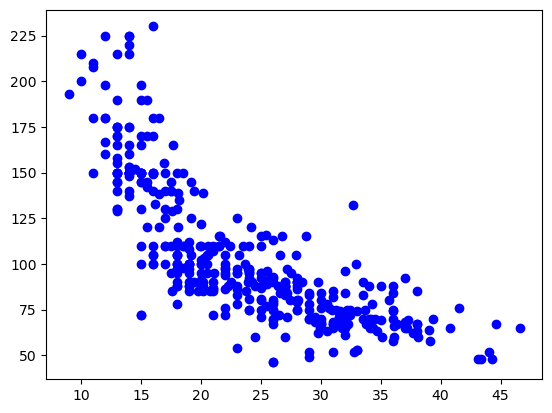

In [5]:
# Visualizar los datos que tenemos respecto a los caballos de potencia (Horsepower) y millas por galeon (MPG)

plt.plot(data['mpg'], data['horsepower'], 'bo')
%matplotlib inline

### Regresión Lineal Cuadrática

Lo primero que vamos a hacer es convertir el modelo en cuadratrico elevando al cuadrado todos los parametros estimadores para posteriormente realizar el modelo cuadrático.

Un modelo cuadrático tendría una pinta tal que así:

MPG = a + (b * Horsepower ^ 2)

In [12]:
# Elevamos al cuadrado los datos de Horsepower

data['horsepower'] = data['horsepower'] ** 2
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,16900.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,27225.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,22500.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,22500.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,19600.0,3449,10.5,70,1,ford torino


In [14]:
# Construimos el modelo de regresión lineal

regresion_cuadratica = LinearRegression().fit(data['horsepower'].values.reshape(-1, 1), data['mpg'])

In [16]:
# Predicción

prediccion = regresion_cuadratica.predict(data['horsepower'].values.reshape(-1, 1))

In [18]:
# Parametros de la predicción

r2 = regresion_cuadratica.score(data['horsepower'].values.reshape(-1, 1), data['mpg'])
ssd = sum((data['mpg'] - prediccion) ** 2)
rse = np.sqrt(ssd / (len(data) - 1 -1))
error = round(100 * rse / np.mean(data['mpg']), 2)

print(r2, ssd, rse, error)

0.5073670089832611 11734.021995832662 5.485183304753854 23.4


Como podemos ver, el modelo no es muy bueno, ya que tiene un R2 de 0.5 y un error del 23%

### Regresión polinomial

La regresión polinomial es aquella que tiene un forma como la siguiente:

MPG = a + (b1 * Horsepower) + (b2 * Horsepower ^ 2) + ... + (bn * Horsepower ^ n) 

In [20]:
# Importamos las librerias para hacer regresión polinomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [30]:
# Definimos el rango máximo del polinomia que deseamos

polinomio = PolynomialFeatures(degree = 3) # queremos llegar por ejemplo a x^3

In [31]:
# Definimos los datos que podrá coger el modelo

estimadores = polinomio.fit_transform(data['horsepower'].values.reshape(-1, 1)) # lo del reshape se ha de hacer en este caso

In [32]:
# Construir el modelo de regresion

regresion_polinomial = LinearRegression().fit(estimadores, data['mpg'])

In [33]:
# Visualizar los valores del modelo

print(regresion_polinomial.intercept_, regresion_polinomial.coef_)

41.276195734904576 [ 0.00000000e+00 -2.57479674e-03  7.85848867e-08 -7.72850043e-13]


### Eliminar outliers